# 12.3 DataFrames visualisieren

Bisher haben wir die Daten für die Visualisierung manuell erzeugt. In diesem
Kapitel beschäftigen wir uns damit, wie Pandas-DataFrames professionell
visualisiert werden. Wir lernen fortgeschrittene Techniken kennen, die beispielsweise für das Anfertigen einer Bachelorarbeit wichtig sind.

## Lernziele

```{admonition} Lernziele
:class: goals
* Sie können den Zeilenindex **.index** und den Spaltenindex **.columns** aus
  einem DataFrame extrahieren.
* Sie können den Text der Achsenbeschriftung drehen.
* Sie können mit **axhline()** und **axvline()** Referenzlinien zu Plots hinzufügen.
* Sie können **Subplots** für komplexere Visualisierungen erstellen.
* Sie können **Korrelationsanalysen** graphisch aufbereiten.
* Sie können Plots für Bachelorarbeiten und Präsentationen optimieren.
```

## Visualisierung von DataFrames

Aber wie kombinieren wir jetzt die Funktionalitäten des Pandas-Moduls mit denen
des Matplotlib-Moduls? Der grundlegende Datentyp für Matplotlib ist das
NumPy-Array und auch in den Pandas-Datenobjekten stecken im Kern NumPy-Arrays.
Daher funktionieren die Plotting-Funktionalitäten von Matplotlib direkt.
Wünschenswert wäre allerdings, den Zeilen- oder den Spaltenindex für die
Beschriftung zu nehmen. Beides ist in dem DataFrame-Objekt abgespeichert. Wir
können mit

* `.index` auf den Zeilenindex und
* `.columns` auf den Spaltenindex

zugreifen. Die Methode `.to_numpy()` liefert die Werte in der Tabelle als
NumPy-Array zurück. Das brauchen wir für die Visualisierung jedoch nicht, denn die
Tabellendaten können direkt visualisiert werden.

Wir verwenden einen realistischen Datensatz und importieren den uns schon
bekannten Datensatz der Top7-Fußballvereine der Bundesliga 2020/21 ([→
Download](https://nextcloud.frankfurt-university.de/s/yJjkkMSkWqcSxGL)). Dann
lassen wir den Zeilen- und Spaltenindex direkt anzeigen:

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('bundesliga_top7_offensive.csv', index_col=0)

print('Zeilenindex: ')
print(data.index)

print('\nSpaltenindex:')
print(data.columns)

Zeilenindex: 
Index(['Manuel Neuer', 'Thomas Müller', 'David Alaba', 'Jérôme Boateng',
       'Robert Lewandowski', 'Joshua Kimmich', 'Kingsley Coman',
       'Benjamin Pavard', 'Alphonso Davies', 'Serge Gnabry',
       ...
       'Petar Musa', 'Florian Hübner', 'Cedric Teuchert', 'Keita Endo',
       'Niko Gießelmann', 'Loris Karius', 'Akaki Gogia', 'Leon Dajaku',
       'Tim Maciejewski', 'Joshua Mees'],
      dtype='object', name='Name', length=177)

Spaltenindex:
Index(['Club', 'Nationality', 'Position', 'Age', 'Matches', 'Starts', 'Mins',
       'Goals', 'Assists', 'Penalty_Goals', 'Penalty_Attempted', 'xG', 'xA',
       'Yellow_Cards', 'Red_Cards'],
      dtype='object')


Nun können wir die Daten aus dem Pandas-DataFrame extrahieren und visualisieren.
Wenn wir beispielsweise wissen wollen, wie alt die Spieler der Eintracht
Frankfurt sind, filtern wir zuerst nach Eintracht Frankfurt. Dann speichern wir
die Namen der Spieler mit dem Zeilenindex in der Variablen `x` und das Alter
`Age` in `y`.

In [2]:
# Daten filtern
data_eintracht_frankfurt = data.loc[ data['Club'] == 'Eintracht Frankfurt' ]
x = data_eintracht_frankfurt.index
y = data_eintracht_frankfurt['Age']

Da es sich bei den Spielern um Kategorien, also diskrete Daten handelt,
verwenden wir ein Balkendiagramm zur Visualisierung. Für eine ansprechende
Darstellung nutzen wir ein vordefiniertes Theme, das wir über `matplotlib.style`
importieren.

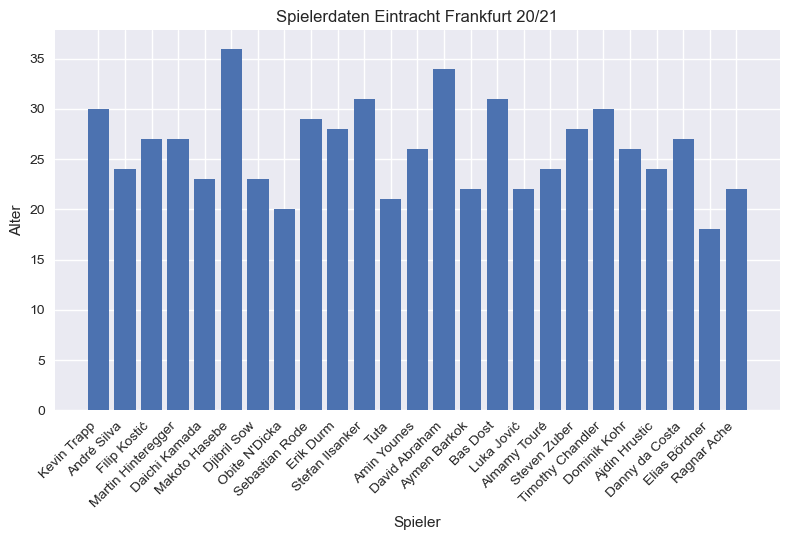

In [3]:
import matplotlib.pyplot as plt

# vordefiniertes Styling-Theme auswählen z.B. 'ggplot', 'seaborn-v0_8', 'dark_background'
import matplotlib.style as style
style.use('seaborn-v0_8') 

# Visualisierung
plt.figure()
plt.bar(x, y)
plt.xlabel('Spieler')
plt.ylabel('Alter')
plt.title('Spielerdaten Eintracht Frankfurt 20/21')

# Rotation der x-Achsenbeschriftung um 45 Grad mit rechtsbündiger Ausrichtung
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Die Funktion `xticks()` manipuliert die Beschriftung der x-Achse. Im obigen
Code-Beispiel wird der Beschriftungstext um 45 Grad gedreht und rechtsbündig
ausgerichtet. `tight_layout()` führt zu weniger Abständen zwischen dem Plot der
umgebenden Zeichenfläche.

## Referenzlinien hinzufügen

Als nächstes möchten wir in den Plot Zusatzinformationen einblenden. So würden
wir gerne hervorheben, wo das Durchschnittsalter der Fußballspieler liegt.
Dadurch können wir schnell ablesen, welcher Spieler über dem Durchschnitt liegt
und welcher jünger als der Durchschnitt ist.

Dazu müssen wir zunächst die Zusatzinformation, in diesem Beispiel den
Mittelwert, aus den Daten berechnen.

In [4]:
mittelwert_alter = data_eintracht_frankfurt['Age'].mean()
print(f'Mittleres Alter der Spieler: {mittelwert_alter:.1f} Jahre')

Mittleres Alter der Spieler: 26.1 Jahre


Nun ergänzen wir den Plot der Altersangaben mit dem Mittelwert. Wir zeichnen
eine horizontale Linie mit der Höhe des Altersdurchschnitts. Dazu verwenden wir
die Funktion `axhline()`. Für vertikale Linien gibt es entsprechend `axvline()`.
Zusätzlich fügen wir mit `legend()` eine Legende ein, um zu erklären, welche
Bedeutung die Linie hat. Das sogenannte Label, also die Beschriftung der
Legende, wir zuvor als Argument in `axhline()` übergeben. Auch die Formatierung
der Linie mit roter Farbe `color='red'`, der Linienstil `linestyle='--'` und die
Linienbreite `linewidth=2` werden an dieser Stelle als Argumente eingefügt, so
dass wir insgesamt den folgenden Plot erhalten:

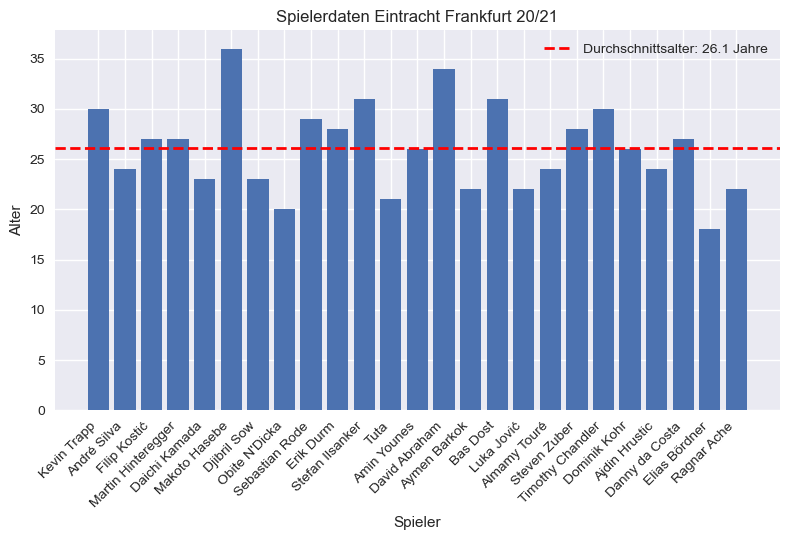

In [5]:
# Daten
x = data_eintracht_frankfurt.index
y = data_eintracht_frankfurt['Age']

# Visualisierung
plt.figure()
plt.bar(x, y)
plt.xlabel('Spieler')
plt.ylabel('Alter')
plt.title('Spielerdaten Eintracht Frankfurt 20/21')

# Rotation der x-Achsenbeschriftung um 45 Grad mit rechtsbündiger Ausrichtung
plt.xticks(rotation=45, ha='right')

# Horizontale Linie für den Mittelwert
plt.axhline(mittelwert_alter, color='red', linestyle='--', linewidth=2, 
            label=f'Durchschnittsalter: {mittelwert_alter:.1f} Jahre')
plt.legend()
plt.tight_layout()
plt.show()

```{admonition} Mini-Übung
:class: miniexercise
Berechnen Sie jetzt den Mittelwert der Minuten, die ein Spieler der Eintracht
Frankfurt durchschnittlich im Einsatz war. Erstellen Sie ein Balkendiagramm 
der Spielzeiten und ergänzen Sie eine horizontale schwarze Linie für den Mittelwert.
```

In [6]:
# Hier Ihr Code

````{admonition} Lösung
:class: miniexercise, toggle
```python
x = data_eintracht_frankfurt.index
y = data_eintracht_frankfurt['Mins']
min_durchschnitt = y.mean()

# Visualisierung
plt.figure()
plt.bar(x, y)
plt.axhline(min_durchschnitt, color='black', linestyle='--', linewidth=2, 
            label=f'Durchschnitt: {min_durchschnitt:.0f} Min')
plt.xlabel('Spieler')
plt.ylabel('Minuten')
plt.title('Spielzeiten Eintracht Frankfurt 20/21')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()
```
````

## Subplots für komplexere Darstellungen

Hier sehen wir eine wichtige Erweiterung zu den bisherigen Plots: Subplots
ermöglichen es uns, mehrere Diagramme nebeneinander in einer Abbildung
darzustellen. Der entscheidende Unterschied zu unseren bisherigen Plots ist,
dass wir nun die Zeichenfläche mit

```python
fig, axes = plt.subplots(1, 2, figsize=(15, 10))
```

erzeugen und die *objektorientierte* Schnittstelle benutzen. Die obige
Code-Zeile erstellt eine Abbildung (`fig`) mit 1 Zeile und 2 Spalten von Plots.
Das `axes`-Array enthält die beiden einzelnen Plot-Bereiche. Auf die einzelnen
Plots können wir folgendermaßen zugreifen:

* `axes[0]`: der erste Plot (links)
* `axes[1]`: der zweite Plot (rechts)

Anstelle der gewohnten Funktion `plt.bar()` verwenden wir nun
`axes[0].bar(...)`oder `axes[1].bar(...)`. Auch werden die Funktionen wir
`plt.title()`zu Methoden, die sich auf das konkrete Objekt beziehen, wie
`axes[0].set_title()`. Wir verwenden noch weitere Optionen zum Styling der
Plots.

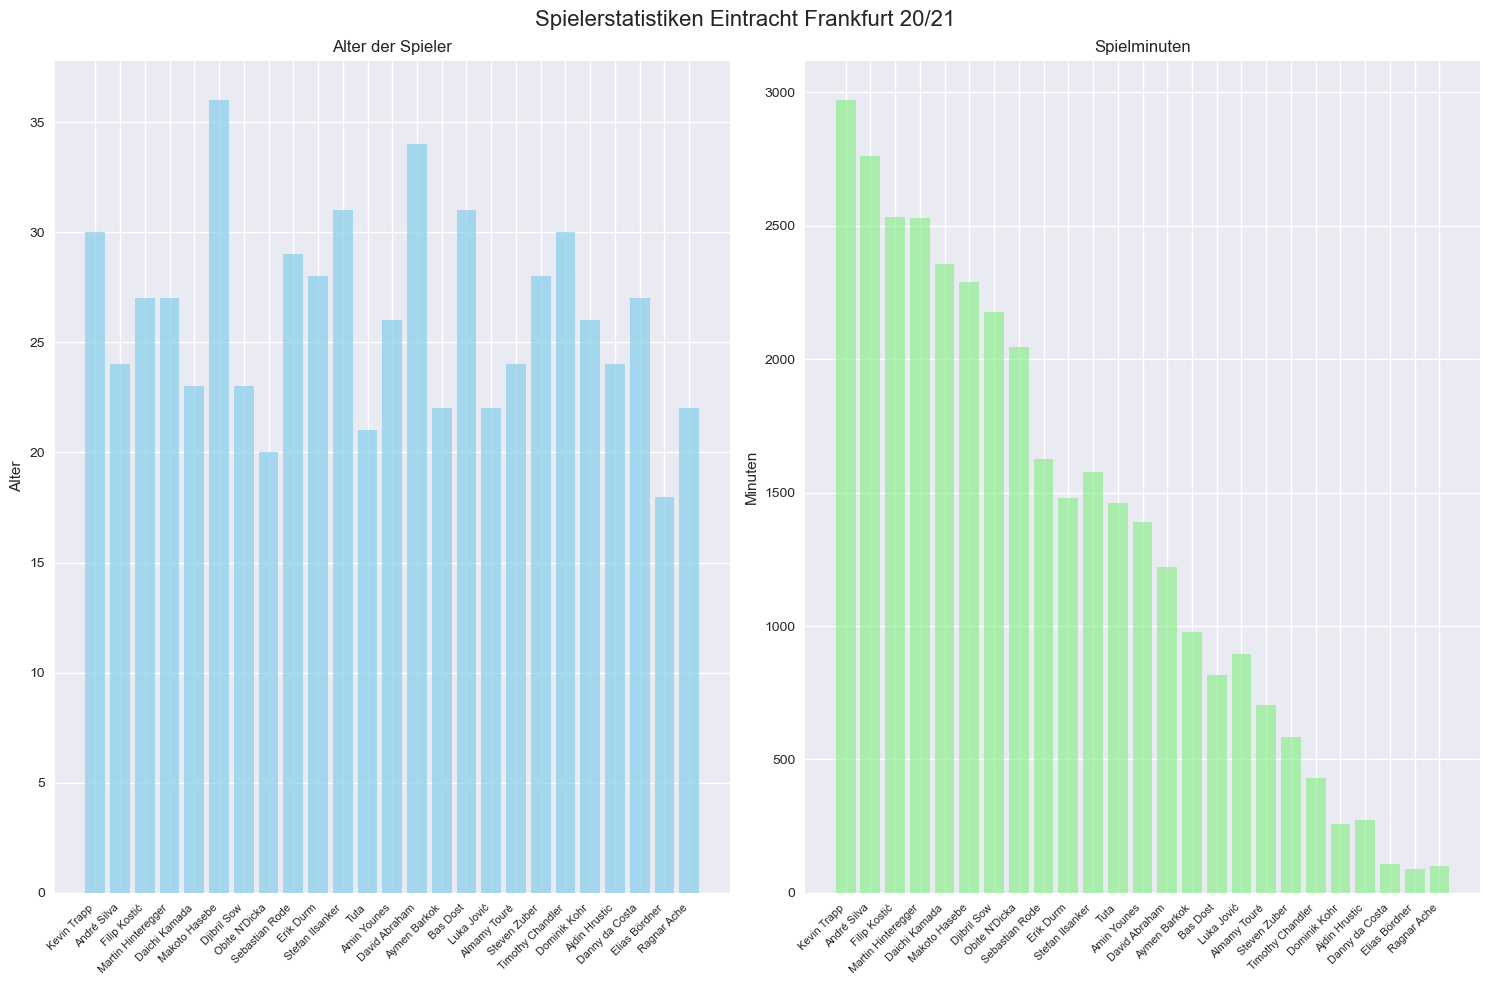

In [7]:
# Daten für Eintracht Frankfurt
eintracht_frankfurt = data[data['Club'] == 'Eintracht Frankfurt']

# 1x2 Subplot-Layout erstellen
fig, axes = plt.subplots(1, 2, figsize=(15, 10))

# Plot 1: Alter
axes[0].bar(eintracht_frankfurt.index, eintracht_frankfurt['Age'],
               color='skyblue', alpha=0.7)
axes[0].set_title('Alter der Spieler')
axes[0].set_ylabel('Alter')

# Erst die Tick-Positionen setzen, dann die Labels
axes[0].set_xticks(range(len(eintracht_frankfurt)))
axes[0].set_xticklabels(eintracht_frankfurt.index, rotation=45, ha='right', fontsize=8)

# Plot 2: Spielminuten
axes[1].bar(eintracht_frankfurt.index, eintracht_frankfurt['Mins'],
               color='lightgreen', alpha=0.7)
axes[1].set_title('Spielminuten')
axes[1].set_ylabel('Minuten')
axes[1].set_xticks(range(len(eintracht_frankfurt)))
axes[1].set_xticklabels(eintracht_frankfurt.index, rotation=45, ha='right', fontsize=8)

plt.suptitle('Spielerstatistiken Eintracht Frankfurt 20/21', fontsize=16)
plt.tight_layout()
plt.show()

## Korrelationsanalyse mit Streudiagrammen

Hier sehen wir eine wichtige statistische Methode: Korrelationsanalysen
untersuchen, ob und wie stark zwei Variablen miteinander zusammenhängen. In
unserem Beispiel fragen wir uns: Gibt es einen Zusammenhang zwischen
Spielminuten und Toren? Oder zwischen Alter und Einsatzzeit?

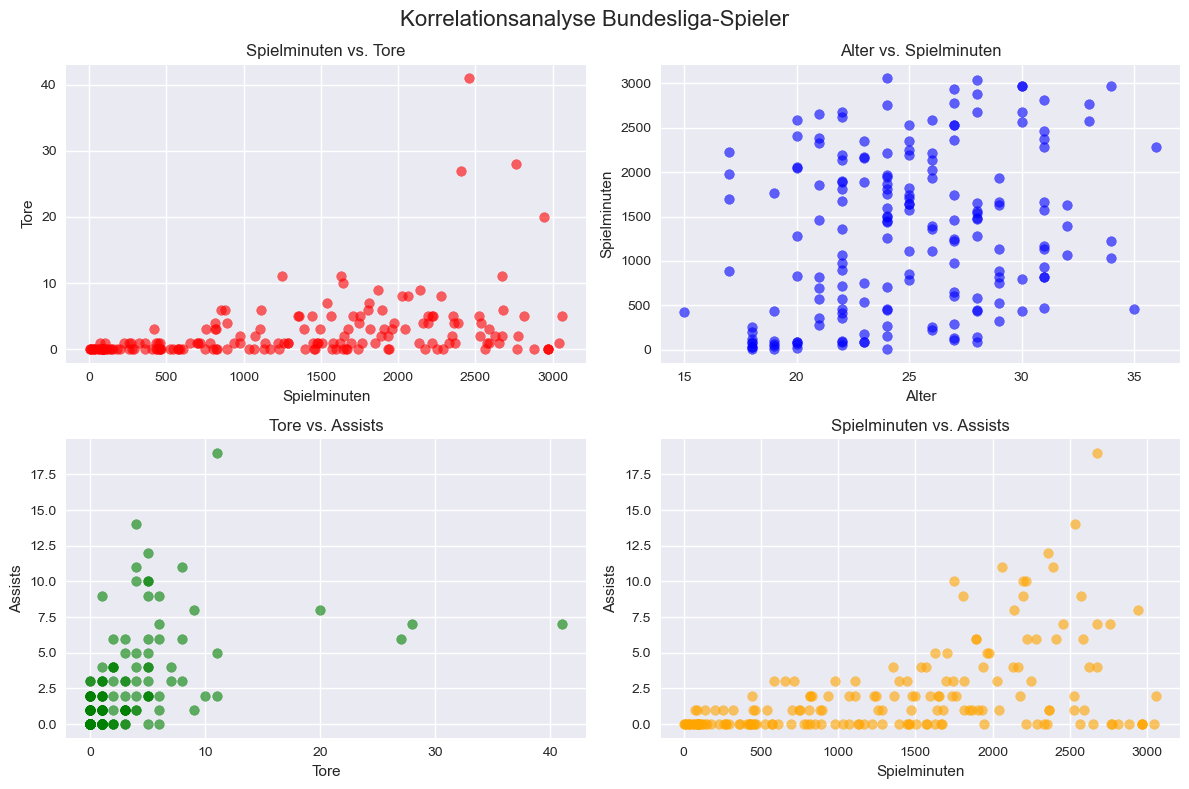

In [8]:
ig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Streudiagramm: Spielminuten vs. Tore
axes[0, 0].scatter(data['Mins'], data['Goals'], alpha=0.6, color='red')
axes[0, 0].set_xlabel('Spielminuten')
axes[0, 0].set_ylabel('Tore')
axes[0, 0].set_title('Spielminuten vs. Tore')

# Streudiagramm: Alter vs. Spielminuten
axes[0, 1].scatter(data['Age'], data['Mins'], alpha=0.6, color='blue')
axes[0, 1].set_xlabel('Alter')
axes[0, 1].set_ylabel('Spielminuten')
axes[0, 1].set_title('Alter vs. Spielminuten')

# Streudiagramm: Tore vs. Torvorbereitungen (= Assists)
axes[1, 0].scatter(data['Goals'], data['Assists'], alpha=0.6, color='green')
axes[1, 0].set_xlabel('Tore')
axes[1, 0].set_ylabel('Assists')
axes[1, 0].set_title('Tore vs. Assists')

# Streudiagramm: Spielminuten vs. Torvorbereitungen (= Assists)
axes[1, 1].scatter(data['Mins'], data['Assists'], alpha=0.6, color='orange')
axes[1, 1].set_xlabel('Spielminuten')
axes[1, 1].set_ylabel('Assists')
axes[1, 1].set_title('Spielminuten vs. Assists')

plt.suptitle('Korrelationsanalyse Bundesliga-Spieler', fontsize=16)
plt.tight_layout()
plt.show()

Hier sehen wir die wichtigsten Muster in Streudiagrammen:

* **Positive Korrelation**: Die Punkte bilden eine aufsteigende Linie: je höher
  die Ursache, desto höher die Wirkung. Beim Beispiel Spielminuten vs. Tore
  können wir interpretieren: "Wer mehr spielt, erzielt tendenziell mehr Tore".
* **Negative Korrelation**: Die Punkte bilden eine absteigende Linie: je höher
  die Ursache, desto niedriger die Wirkung. Beim Beispiel Alter vs. Spielminuten
  können wir interpretieren: "Ältere Spieler bekommen tendenziell weniger
  Einsatzzeit".
* **Keine Korrelation**: Die Punkte sind zufällig verteilt: kein erkennbares
  Muster. Wir interpretieren: "Zwischen den Variablen gibt es keinen
  systematischen Zusammenhang".

## Export von Grafiken

Für die Verwendung in Dokumenten oder Präsentationen müssen Grafiken exportiert
werden:

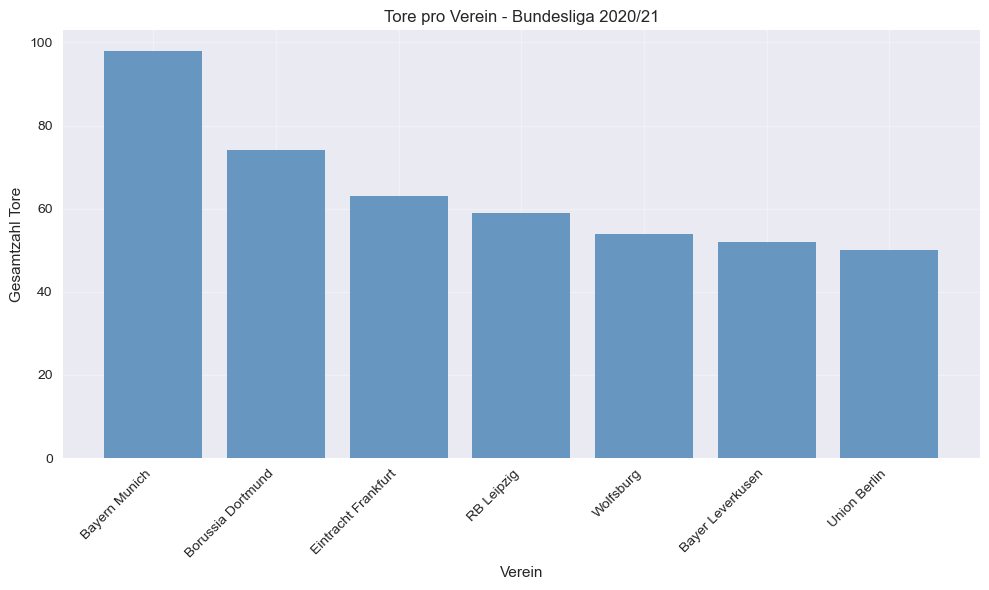

In [9]:
# Beispiel-Plot erstellen
plt.figure(figsize=(10, 6))
verein_tore = data.groupby('Club')['Goals'].sum().sort_values(ascending=False)

plt.bar(verein_tore.index, verein_tore.values, color='steelblue', alpha=0.8)
plt.xlabel('Verein')
plt.ylabel('Gesamtzahl Tore')
plt.title('Tore pro Verein - Bundesliga 2020/21')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Export in verschiedenen Formaten
plt.savefig('bundesliga_tore.png', dpi=300, bbox_inches='tight')  # Für Web/Präsentationen
plt.savefig('bundesliga_tore.pdf', bbox_inches='tight')           # Für LaTeX/Publikationen
plt.savefig('bundesliga_tore.svg', bbox_inches='tight')           # Für Vektorgrafiken

plt.show()

## Zusammenfassung und Ausblick

In diesem Kapitel haben wir gelernt, wie man DataFrames professionell
visualisiert. Diese Techniken bilden die Grundlage für die Datenvisualisierung
in der Praxis. Mit DataFrames und Matplotlib können wir reale Datensätze
ansprechend präsentieren. Mit der Korrelationsanalyse haben wir auch einen
ersten Schritt Richtung Data Science gemacht. Wie wir Trends und Muster in Daten
finden, werden wir im nächsten Kapitel lernen, wenn wir uns der Regression
widmen.